 ## **HOMEWORK 2**

Afonso Rosa, ist1106700<br>
Leticia Vong, ist1105991

**II. Programming and critical analysis** [8v]

Consider the parkinsons.csv dataset (available at the course’s webpage), where the goal is to predict a patient’s score on the Unified Parkinson’s Disease Rating Scale based on various biomedical measurements.

To answer question 5), average the performance of the models over 10 separate runs. In each run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

**5. [2v]** Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 neurons each and no activation functions, and another MLP Regressor with 2 hidden layers of 10 neurons each using ReLU activation functions. (Use random_state=0 on the MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/leti/.local/lib/python3.10/site-packages/sklearn/n

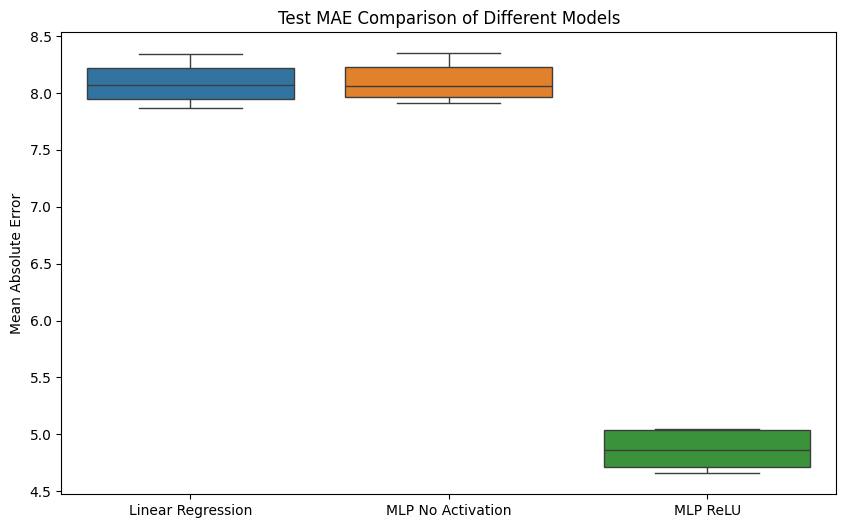

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('parkinsons.csv') 

X = data.drop(columns=['target']) 
y = data['target']

mae_linear = []
mae_mlp_no_activation = []
mae_mlp_relu = []

for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)
    mae_linear.append(mean_absolute_error(y_test, y_pred_linear))
    
    mlp_no_activation = MLPRegressor(hidden_layer_sizes=(10, 10), activation='identity', random_state=0)
    mlp_no_activation.fit(X_train, y_train)
    y_pred_no_activation = mlp_no_activation.predict(X_test)
    mae_mlp_no_activation.append(mean_absolute_error(y_test, y_pred_no_activation))
    
    mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
    mlp_relu.fit(X_train, y_train)
    y_pred_relu = mlp_relu.predict(X_test)
    mae_mlp_relu.append(mean_absolute_error(y_test, y_pred_relu))

results = pd.DataFrame({
    'Linear Regression': mae_linear,
    'MLP No Activation': mae_mlp_no_activation,
    'MLP ReLU': mae_mlp_relu
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=results)
plt.title('Test MAE Comparison of Different Models')
plt.ylabel('Mean Absolute Error')
plt.show()
